In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.ssa as ssa

In [3]:
import vsc_l

## Instantiate system

In [4]:
model = vsc_l.model()
model.Dt = 5e-6
model.decimation = 1
model.N_store = 100_000
model.update()

## Solve steady state

In [5]:
model.ini({'omega':0.0},xy_0=10)


True

In [6]:
model.report_x()
model.report_y()
model.report_u()
model.report_z()

theta =  0.00
i_sD  = -0.00
i_sQ  =  0.00
v_sD  = 326.60
v_sQ  = -0.00
v_ga  =326.60
v_gb  =-163.30
v_gc  =-163.30
omega = 0.00
eta_ta = 0.82
eta_tb =-0.41
eta_tc =-0.41
v_dc  =800.00
i_sa  = -0.00
i_sb  =  0.00
i_sc  =  0.00
v_sa  = 326.60
v_sb  = -163.30
v_sc  = -163.30
v_gD  = 326.60
v_gQ  =  0.00


In [20]:
model = vsc_l.model()
model.Dt = 25e-6
model.decimation = 10
Dt = 50e-6
times = np.arange(0.0,1.0,Dt)

model.ini({'omega':0.0},xy_0=10)
omega_g = 2*np.pi*50.0
theta_g = 0.0
V_base = 400.0*np.sqrt(2.0/3.0)
v_dc = 800.0
PI23 = 2.0/3.0*np.pi
phi_g = 0.1
for it,t in enumerate(times):

    v_ga = V_base*np.cos(theta_g)
    v_gb = V_base*np.cos(theta_g - PI23)
    v_gc = V_base*np.cos(theta_g + PI23)

    eta_ta = V_base*np.cos(phi_g + theta_g)*2/v_dc
    eta_tb = V_base*np.cos(phi_g + theta_g - PI23)*2/v_dc
    eta_tc = V_base*np.cos(phi_g + theta_g + PI23)*2/v_dc

    theta_g += Dt*omega_g


    model.run(t,{'v_ga':v_ga,'v_gb':v_gb,'v_gc':v_gc,
                 'eta_ta':eta_ta,'eta_tb':eta_tb,'eta_tc':eta_tc})
model.post();



Text(0.5, 0, 'Time (s)')

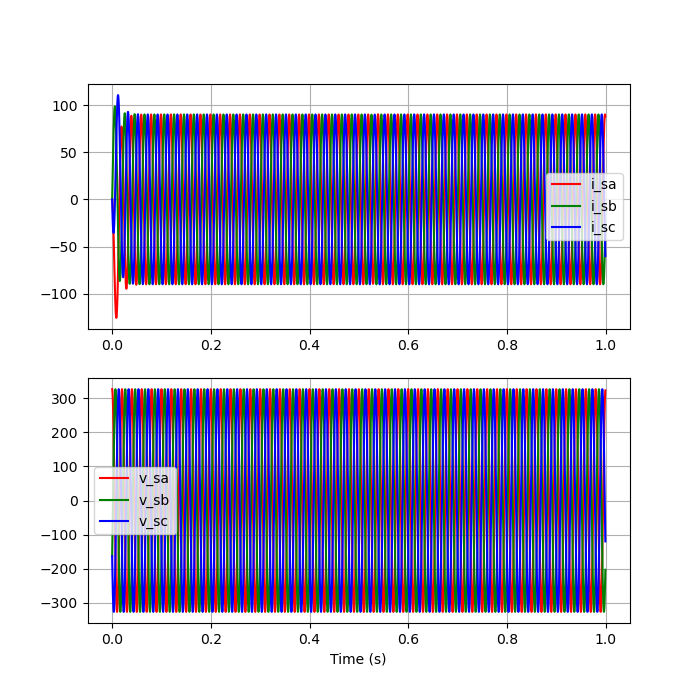

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes[0].plot(model.Time,model.get_values('i_sa'),label='i_sa',color='r')
axes[0].plot(model.Time,model.get_values('i_sb'),label='i_sb',color='g')
axes[0].plot(model.Time,model.get_values('i_sc'),label='i_sc',color='b')

axes[1].plot(model.Time,model.get_values('v_sa'),label='v_sa',color='r')
axes[1].plot(model.Time,model.get_values('v_sb'),label='v_sb',color='g')
axes[1].plot(model.Time,model.get_values('v_sc'),label='v_sc',color='b')


for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

In [7]:
ssa.damp_report(syst)

,Real,Imag,Freq.,Damp
Mode 1,-1265.707963,20276.036010,3227.031357,0.062303
Mode 2,-1265.707963,-20276.036010,3227.031357,0.062303
Mode 3,-1265.707963,19647.717479,3127.031357,0.064287
Mode 4,-1265.707963,-19647.717479,3127.031357,0.064287
Mode 5,-31.415927,314.159265,50.000000,0.099504
Mode 6,-31.415927,-314.159265,50.000000,0.099504


In [8]:
ssa.participation(syst).abs().round(2)

,Mode 1,Mode 2,Mode 3,Mode 4,Mode 5,Mode 6
i_tD_g01,0.13,0.13,0.13,0.13,0.25,0.25
i_tQ_g01,0.13,0.13,0.13,0.13,0.25,0.25
v_mD_g01,0.25,0.25,0.25,0.25,0.00,0.00
v_mQ_g01,0.25,0.25,0.25,0.25,0.00,0.00
i_sD_g01,0.13,0.13,0.13,0.13,0.25,0.25
i_sQ_g01,0.13,0.13,0.13,0.13,0.25,0.25


### Open loop

In [9]:
Δt = 50.0e-6 
times = np.arange(0.0,0.2,Δt)

In [10]:
syst.initialize([{'eta_q_g01':0.8693333333333333,'G_d_g01':0.0}],xy0=100)
eta_q_g01_0 = syst.get_value('eta_q_g01')
it = 0
for t in times:
    
    eta_q_g01 = eta_q_g01_0
    if t>5e-3: 
        eta_q_g01 = eta_q_g01_0*1.05
   # if t>10e-3: 
   #     eta_q_g01 = eta_q_g01_0
        
    events=[{'t_end':t,'eta_q_g01':eta_q_g01}]
    syst.run(events)

    it += 1
    
syst.post();

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes[0].plot(syst.T,syst.get_values('i_sd_g01'),label='i_sd_g01')
axes[0].plot(syst.T,syst.get_values('i_sq_g01'),label='i_sq_g01')


for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


Text(0.5, 0, 'Time (s)')

In [12]:
syst.N_store

100000

### CTRL1

In [13]:
syst = vsc_lcl_class()
syst.Dt = 5e-6
syst.decimation =1
syst.N_store =100_000
syst.update()

Δt = 50.0e-6 
times = np.arange(0.0,0.2,Δt)

syst.initialize([{'G_d_g01':0.005}],xy0=1000)
eta_q_g01_0 = syst.get_value('eta_q_g01')
it = 0

i_sd,i_sq,v_sd,v_sq = syst.get_mvalue(['i_sd_g01','i_sq_g01','v_sd_g01','v_sq_g01'])
v_dc = syst.get_value('v_dc_g01')
eta_d = syst.get_value('eta_d_g01')  
eta_q = syst.get_value('eta_q_g01')  

# control design
R_t_g01,L_t_g01  = syst.get_value('R_t_g01'),syst.get_value('L_t_g01')
R_s_g01,L_s_g01,C_m_g01  = syst.get_value('R_s_g01'),syst.get_value('L_s_g01'),syst.get_value('C_m_g01') 
R = R_t_g01 + R_s_g01
L = L_t_g01 + L_s_g01
tau_ctrl_1 = 5e-3; #Time constant of CTRL 1
K_pi = L/tau_ctrl_1; #Proportional gain of CTRL 1
K_ii = R/tau_ctrl_1; #Integral gain of CTRL 1
xi = np.zeros((2,1))

#u_d = K_pi*epsilon_d + K_ii*xi_d
#u_q = K_pi*epsilon_q + K_ii*xi_q   
#u_d = eta_d*v_dc/2 - v_sd + L*i_sq*omega => eta_d = (u_d + v_sd - L*i_sq*omega)*2/v_dc
#u_q = eta_q*v_dc/2 - v_sq - L*i_sd*omega => eta_q = (u_q + v_sq + L*i_sd*omega)*2/v_dc
omega = 2*np.pi*50
u_d_0 = eta_d*v_dc/2 - v_sd + L*i_sq*omega
u_q_0 = eta_q*v_dc/2 - v_sq - L*i_sd*omega 
i_sd_ref_0 = i_sd
i_sq_ref_0 = i_sq

# simulation
for t in times:
    
    # measurements
    i_sd = syst.get_value('i_sd_g01')
    i_sq = syst.get_value('i_sq_g01')  
    v_sd = syst.get_value('v_sd_g01')
    v_sq = syst.get_value('v_sq_g01')  
    v_dc = syst.get_value('v_dc_g01')
    
    i_sd_ref = i_sd_ref_0
    i_sq_ref = i_sq_ref_0
    if t>10e-3: i_sd_ref = 20
    if t>100e-3: i_sq_ref = 30
        
    xi_d = xi[0,0]
    xi_q = xi[1,0]
    
    epsilon_d = i_sd_ref - i_sd
    epsilon_q = i_sq_ref - i_sq
    
    u_d = K_pi*epsilon_d + K_ii*xi_d + u_d_0
    u_q = K_pi*epsilon_q + K_ii*xi_q + u_q_0  

    eta_d = (u_d + v_sd - L*i_sq*omega)*2/v_dc
    eta_q = (u_q + v_sq + L*i_sd*omega)*2/v_dc
    
    xi[0,0] += Δt*epsilon_d
    xi[1,0] += Δt*epsilon_q
    
    events=[{'t_end':t,'eta_d_g01':eta_d,'eta_q_g01':eta_q}]
    syst.run(events)

    it += 1
    
syst.post();

In [14]:
plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes[0].plot(syst.T,syst.get_values('i_sd_g01'),label='i_sd_g01')
axes[0].plot(syst.T,syst.get_values('i_sq_g01'),label='i_sq_g01')

axes[1].plot(syst.T,syst.get_values('eta_D_g01'),label='eta_D_g01')
axes[1].plot(syst.T,syst.get_values('eta_Q_g01'),label='eta_Q_g01')

for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Time (s)')

### CTRL1 + Active damping

In [15]:
syst = vsc_lcl_class()
syst.Dt = 5e-6
syst.decimation =1
syst.N_store =100_000
syst.update()

Δt = 50.0e-6 
times = np.arange(0.0,0.2,Δt)

syst.initialize([{'G_d_g01':0.0}],xy0=1000)
eta_q_g01_0 = syst.get_value('eta_q_g01')
it = 0

i_sd,i_sq,i_td,i_tq,v_sd,v_sq = syst.get_mvalue(['i_sd_g01','i_sq_g01','i_td_g01','i_tq_g01','v_sd_g01','v_sq_g01'])
v_dc = syst.get_value('v_dc_g01')
eta_d = syst.get_value('eta_d_g01')  
eta_q = syst.get_value('eta_q_g01')  

# control design
R_t_g01,L_t_g01  = syst.get_value('R_t_g01'),syst.get_value('L_t_g01')
R_s_g01,L_s_g01,C_m_g01  = syst.get_value('R_s_g01'),syst.get_value('L_s_g01'),syst.get_value('C_m_g01') 
R = R_t_g01 + R_s_g01
L = L_t_g01 + L_s_g01
tau_ctrl_1 = 5e-3; #Time constant of CTRL 1
K_pi = L/tau_ctrl_1; #Proportional gain of CTRL 1
K_ii = R/tau_ctrl_1; #Integral gain of CTRL 1
G_v = 1.0  #Active damping
# en pu G_d = L/C*G_v

xi = np.zeros((2,1))

#u_d = K_pi*epsilon_d + K_ii*xi_d
#u_q = K_pi*epsilon_q + K_ii*xi_q   
#u_d = eta_d*v_dc/2 - v_sd + L*i_sq*omega => eta_d = (u_d + v_sd - L*i_sq*omega)*2/v_dc
#u_q = eta_q*v_dc/2 - v_sq - L*i_sd*omega => eta_q = (u_q + v_sq + L*i_sd*omega)*2/v_dc
omega = 2*np.pi*50
u_d_0 = eta_d*v_dc/2 - v_sd + L*i_sq*omega + G_v*(i_td - i_sd)
u_q_0 = eta_q*v_dc/2 - v_sq - L*i_sd*omega + G_v*(i_tq - i_sq)
i_sd_ref_0 = i_sd
i_sq_ref_0 = i_sq

# simulation
for t in times:
    
    # measurements
    i_sd = syst.get_value('i_sd_g01')
    i_sq = syst.get_value('i_sq_g01')  
    v_sd = syst.get_value('v_sd_g01')
    v_sq = syst.get_value('v_sq_g01')
    i_td = syst.get_value('i_td_g01')
    i_tq = syst.get_value('i_tq_g01') 
    v_dc = syst.get_value('v_dc_g01')
    
    i_sd_ref = i_sd_ref_0
    i_sq_ref = i_sq_ref_0
    if t>10e-3: i_sd_ref = 20
    if t>100e-3: i_sq_ref = 30
        
    xi_d = xi[0,0]
    xi_q = xi[1,0]
    
    epsilon_d = i_sd_ref - i_sd
    epsilon_q = i_sq_ref - i_sq
    
    u_d = K_pi*epsilon_d + K_ii*xi_d + u_d_0
    u_q = K_pi*epsilon_q + K_ii*xi_q + u_q_0  

    eta_d = (u_d + v_sd - L*i_sq*omega - G_v*(i_td - i_sd))*2/v_dc
    eta_q = (u_q + v_sq + L*i_sd*omega - G_v*(i_tq - i_sq))*2/v_dc
    
    xi[0,0] += Δt*epsilon_d
    xi[1,0] += Δt*epsilon_q
    
    events=[{'t_end':t,'eta_d_g01':eta_d,'eta_q_g01':eta_q}]
    syst.run(events)

    it += 1
    
syst.post();

In [16]:
plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes[0].plot(syst.T,syst.get_values('i_sd_g01'),label='i_sd_g01')
axes[0].plot(syst.T,syst.get_values('i_sq_g01'),label='i_sq_g01')

axes[1].plot(syst.T,syst.get_values('eta_D_g01'),label='eta_D_g01')
axes[1].plot(syst.T,syst.get_values('eta_Q_g01'),label='eta_Q_g01')

for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Time (s)')

### CTRL1 + Active damping + delay

In [17]:
syst = vsc_lcl_class()
syst.Dt = 5e-6
syst.decimation =1
syst.N_store =100_000
syst.update()

Δt = 500.0e-6 
times = np.arange(0.0,0.2,Δt)

syst.initialize([{'G_d_g01':0.0, 'C_m_g01':4e-6}],xy0=1000)
eta_q_g01_0 = syst.get_value('eta_q_g01')
it = 0

i_sd,i_sq,i_td,i_tq,v_sd,v_sq = syst.get_mvalue(['i_sd_g01','i_sq_g01','i_td_g01','i_tq_g01','v_sd_g01','v_sq_g01'])
v_dc = syst.get_value('v_dc_g01')
eta_d = syst.get_value('eta_d_g01')  
eta_q = syst.get_value('eta_q_g01')  

# control design
R_t_g01,L_t_g01  = syst.get_value('R_t_g01'),syst.get_value('L_t_g01')
R_s_g01,L_s_g01,C_m_g01  = syst.get_value('R_s_g01'),syst.get_value('L_s_g01'),syst.get_value('C_m_g01') 
R = R_t_g01 + R_s_g01
L = L_t_g01 + L_s_g01
tau_ctrl_1 = 5e-3; #Time constant of CTRL 1
K_pi = L/tau_ctrl_1; #Proportional gain of CTRL 1
K_ii = R/tau_ctrl_1; #Integral gain of CTRL 1
G_v = 0.0  #Active damping

xi = np.zeros((2,1))

#u_d = K_pi*epsilon_d + K_ii*xi_d
#u_q = K_pi*epsilon_q + K_ii*xi_q   
#u_d = eta_d*v_dc/2 - v_sd + L*i_sq*omega => eta_d = (u_d + v_sd - L*i_sq*omega)*2/v_dc
#u_q = eta_q*v_dc/2 - v_sq - L*i_sd*omega => eta_q = (u_q + v_sq + L*i_sd*omega)*2/v_dc
omega = 2*np.pi*50
u_d_0 = eta_d*v_dc/2 - v_sd + L*i_sq*omega + G_v*(i_td - i_sd)
u_q_0 = eta_q*v_dc/2 - v_sq - L*i_sd*omega + G_v*(i_tq - i_sq)
i_sd_ref_0 = i_sd
i_sq_ref_0 = i_sq
eta_d_prev = eta_d
eta_q_prev = eta_q
damp_d_list = []
damp_q_list = []
# simulation
for t in times:
    
    # measurements
    i_sd = syst.get_value('i_sd_g01')
    i_sq = syst.get_value('i_sq_g01')  
    v_sd = syst.get_value('v_sd_g01')
    v_sq = syst.get_value('v_sq_g01')
    i_td = syst.get_value('i_td_g01')
    i_tq = syst.get_value('i_tq_g01') 
    v_dc = syst.get_value('v_dc_g01')
    
    i_sd_ref = i_sd_ref_0
    i_sq_ref = i_sq_ref_0
    if t>10e-3: i_sd_ref = 20
    if t>100e-3: i_sq_ref = 30
        
    xi_d = xi[0,0]
    xi_q = xi[1,0]
    
    epsilon_d = i_sd_ref - i_sd
    epsilon_q = i_sq_ref - i_sq
    
    u_d = K_pi*epsilon_d + K_ii*xi_d + u_d_0
    u_q = K_pi*epsilon_q + K_ii*xi_q + u_q_0  

    i_m_d_0  = i_td - i_sd
    i_m_q_0  = i_tq - i_sq
    i_m_d_90 = (i_tq - i_sq) 
    i_m_q_90 = (i_td - i_sd) 
    
    K_0 =  -0.6453
    K_90 = -(1-0.6453)
    
    K_0  = -0.5286373998102673
    K_90 = -0.8488477481397001

    K_0  = -1.0
    K_90 = -0.0

    damp_d =  G_v*(K_0*i_m_d_0+K_90*i_m_d_90)
    damp_q =  G_v*(K_0*i_m_q_0-K_90*i_m_q_90)
    
    eta_d = (u_d + v_sd - L*i_sq*omega + damp_d)*2/v_dc
    eta_q = (u_q + v_sq + L*i_sd*omega + damp_q)*2/v_dc
    
    xi[0,0] += Δt*epsilon_d
    xi[1,0] += Δt*epsilon_q
    
    events=[{'t_end':t,'eta_d_g01':eta_d_prev,'eta_q_g01':eta_q_prev}]
    syst.run(events)

    eta_d_prev = eta_d
    eta_q_prev = eta_q

    damp_d_list += [damp_d]
    damp_q_list += [damp_q]

    it += 1
    
syst.post();

Damp_d = np.array(damp_d_list)
Damp_q = np.array(damp_q_list) 

In [18]:
plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7),sharex=True)

axes[0].plot(syst.T,syst.get_values('i_sd_g01'),label='i_sd_g01')
axes[0].plot(syst.T,syst.get_values('i_sq_g01'),label='i_sq_g01')

#axes[0].plot(syst.T,syst.get_values('damp_D')-syst.get_values('damp_D')[0],label='damp_D')
axes[1].plot(syst.T,syst.get_values('damp_Q'),label='damp_Q')

#axes[1].plot(syst.T,syst.get_values('eta_D_g01'),label='eta_D_g01')
#axes[1].plot(syst.T,syst.get_values('eta_Q_g01'),label='eta_Q_g01')
#axes[0].plot(times,Damp_d-Damp_d[0],label='Damp_d')
axes[1].plot(times,Damp_q-Damp_q[0],label='Damp_q')
for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Time (s)')

In [19]:
T_2damp = 1/(3227.031357)
phase = Δt/(T_2damp)*2*np.pi
tangente = np.tan(phase)

K_90 = (1/((1/tangente)**2+1))**0.5
K_0 = (1 - K_90**2)**0.5

print(f'    K_0  = {-K_0}')
print(f'    K_90 = {-K_90}')

    K_0  = -0.7562459294598116
    K_90 = -0.6542874705933666


In [20]:
T_2damp = 1/(3227.031357)
phase = Δt/(T_2damp)*2*np.pi

In [21]:
np.rad2deg(phase)*20/3.227

3600.034981468857

In [22]:
T_2damp

0.00030988233127354764

## CTRL1 in state feedback

In [104]:
import pydae.ssa as ssa
import scipy.signal as sctrl

In [105]:
ssa.eval_ss(syst);

In [106]:
syst = vsc_lcl_class()
syst.Dt = 5e-6
syst.decimation =1
syst.N_store =100_000
syst.update()

Δt = 50e-6 
#x_d_ctrl_list = ['i']   # states to consider in the reduction
z_ctrl_list = [ 'i_sd_g01', 'i_sq_g01']     # outputs to consider in the controller
u_ctrl_list = ['eta_d_g01','eta_q_g01']     # intputs to consider in the controller
z_ctrl_idxs = [syst.outputs_list.index(item) for item in z_ctrl_list]
u_ctrl_idxs = [syst.inputs_run_list.index(item) for item in u_ctrl_list]

syst.Δt = Δt

## Calculate equilibirum point
syst.initialize([{'G_d_g01':0.0,'eta_d_g01':0.0,'eta_q_g01':-0.8693333,'v_1_Q':-326,'v_1_D':0.0}],xy0=1000)
ssa.eval_ss(syst)

# linear continous plant
A_p = syst.A
B_p = syst.B
C_p = syst.C
D_p = syst.D

# plant discretization
A_d,B_d,C_d,D_d,Dt = sctrl.cont2discrete((A_p,B_p,C_p,D_p),Δt,method='zoh')

N_z_d,N_x_d = C_d.shape  # discreticed plant dimensions
N_x_d,N_u_d = B_d.shape

# convenient matrices
O_ux = np.zeros((N_u_d,N_x_d))
O_xu = np.zeros((N_x_d,N_u_d))
O_uu = np.zeros((N_u_d,N_u_d))
I_uu = np.eye(N_u_d)

syst.A_d = A_d
syst.B_d = B_d


# Controller ##################################################################################
B_c = B_d[:,u_ctrl_idxs]
C_c = C_d[z_ctrl_idxs,:]
D_c = D_d[z_ctrl_idxs,:]

N_x_c,N_u_d = B_c.shape
N_z_c,N_x_c = C_c.shape


O_ux = np.zeros((N_u_d,N_x_d))
O_xu = np.zeros((N_x_d,N_u_d))
O_uu = np.zeros((N_u_d,N_u_d))
I_uu = np.eye(N_u_d)


# discretized plant:
# Δx_d = A_d*Δx_d + B_d*Δu_d
# Δz_c = C_c*Δx_d + D_c*Δu_d

# dinamic extension:
# Δx_d = A_d*Δx_d + B_d*Δu_d
# Δx_i = Δx_i + Δt*(Δz_c-Δz_c_ref) = Δx_i + Δt*C_c*Δx_d - Dt*Δz_c_ref
# Δz_c = z_c - z_c_0
# Δz_c_ref = z_c_ref - z_c_0
# (Δz_c-Δz_c_ref) = z_c - z_c_ref

A_e = np.block([
                [    A_d, O_xu],    # Δx_d
                [ Δt*C_c, I_uu],    # Δx_i    
               ])

B_e = np.block([
                [   B_c],
                [   O_uu],    
               ])



# weighting matrices
Q_c = np.eye(A_e.shape[0])
Q_c[-1,-1] = 1e4
Q_c[-2,-2] = 1e4

R_c = np.eye(B_c.shape[1])*100000


K_c,S_c,E_c = ssa.dlqr(A_e,B_e,Q_c,R_c)

E_cont = np.log(E_c)/Δt

In [107]:
-E_c.real/np.abs(E_c)

array([-0.4895141 , -0.4895141 , -0.51666282, -0.51666282, -0.99987441,
       -0.99987441, -0.99999999, -0.99999999])

In [108]:
E_c

array([0.37274688+6.63992221e-01j, 0.37274688-6.63992221e-01j,
       0.39312068+6.51460819e-01j, 0.39312068-6.51460819e-01j,
       0.97147951+1.53979236e-02j, 0.97147951-1.53979236e-02j,
       0.99690471+1.40510238e-04j, 0.99690471-1.40510238e-04j])

In [109]:
syst = vsc_lcl_class()
syst.Dt = 5e-6
syst.decimation =10
syst.N_store =1_000_000
syst.update()
times = np.arange(0.0,0.2,Δt)

syst.initialize([{'G_d_g01':0.0,'eta_d_g01':0.0,'eta_q_g01':-0.8693333,'v_1_Q':-326,'v_1_D':0.0}],xy0=1000)
i_sd = syst.get_value('i_sd_g01')
i_sq = syst.get_value('i_sq_g01')  
v_sd = syst.get_value('v_sd_g01')
v_sq = syst.get_value('v_sq_g01')
i_td = syst.get_value('i_td_g01')
i_tq = syst.get_value('i_tq_g01') 
v_md = syst.get_value('v_md_g01')
v_mq = syst.get_value('v_mq_g01') 
v_dc = syst.get_value('v_dc_g01')
eta_d = syst.get_value('eta_d_g01')
eta_q = syst.get_value('eta_q_g01')
eta_d_prev = eta_d
eta_q_prev = eta_q 
i_sd_ref_0 = i_sd
i_sq_ref_0 = i_sq
x_d_0 = np.array([i_td,i_tq,v_md,v_mq,i_sd,i_sq]).reshape(6,1)
u_d_0 = np.array([eta_d,eta_q]).reshape(2,1)
syst.Δxi = np.zeros((2,1))    
it = 0
for t in times:
    
    # measurements
    i_sd = syst.get_value('i_sd_g01')
    i_sq = syst.get_value('i_sq_g01')  
    v_sd = syst.get_value('v_sd_g01')
    v_sq = syst.get_value('v_sq_g01')
    i_td = syst.get_value('i_td_g01')
    i_tq = syst.get_value('i_tq_g01') 
    v_md = syst.get_value('v_md_g01')
    v_mq = syst.get_value('v_mq_g01') 
    v_dc = syst.get_value('v_dc_g01')

    x_d = np.array([i_td,i_tq,v_md,v_mq,i_sd,i_sq]).reshape(6,1)
    Δx_d = x_d - x_d_0 
    
    Δx_i = syst.Δxi   
    
    i_sd_ref = i_sd_ref_0
    i_sq_ref = i_sq_ref_0
    if t>10e-3: i_sd_ref = 20
    if t>100e-3: i_sq_ref = 30
           
    epsilon_d = i_sd - i_sd_ref
    epsilon_q = i_sq - i_sq_ref  
    
    epsilon = np.block([[epsilon_d],[epsilon_q]])
    

    Δx_e = np.block([[Δx_d], [Δx_i]])
    
    Δu_d = -K_c @ Δx_e
    
    u_d = Δu_d + u_d_0
    
    syst.Δxi += Δt*epsilon
    
    eta_d = u_d[0,0]
    eta_q = u_d[1,0]

    
    events=[{'t_end':t,'eta_d_g01':eta_d_prev,'eta_q_g01':eta_q_prev}]
    syst.run(events)

    eta_d_prev = eta_d
    eta_q_prev = eta_q
    it += 1
    
syst.post();

In [110]:
plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7),sharex=True)

axes[0].plot(syst.T,syst.get_values('i_sd_g01'),label='i_sd_g01')
axes[0].plot(syst.T,syst.get_values('i_sq_g01'),label='i_sq_g01')


for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


Text(0.5, 0, 'Time (s)')

In [98]:
L_t

NameError: name 'L_t' is not defined

In [99]:
K_c

matrix([[ 3.05930459e-02,  2.28423291e-04, -5.37914607e-04,
         -4.28085968e-06, -2.70547919e-02, -2.11027070e-04,
          2.11938528e-01, -1.06665661e-01],
        [-2.28423291e-04,  3.05930459e-02,  4.28085968e-06,
         -5.37914607e-04,  2.11027070e-04, -2.70547919e-02,
          1.06665661e-01,  2.11938528e-01]])

In [132]:
syst = vsc_lcl_class()
syst.Dt = 5e-6
syst.decimation =1
syst.N_store =100_000
syst.update()

Δt = 100e-6 
#x_d_ctrl_list = ['i']   # states to consider in the reduction
z_ctrl_list = [ 'i_sd_g01', 'i_sq_g01']     # outputs to consider in the controller
u_ctrl_list = ['eta_d_g01','eta_q_g01']     # intputs to consider in the controller
z_ctrl_idxs = [syst.outputs_list.index(item) for item in z_ctrl_list]
u_ctrl_idxs = [syst.inputs_run_list.index(item) for item in u_ctrl_list]

syst.Δt = Δt

## Calculate equilibirum point
syst.initialize([{'G_d_g01':0.0,'eta_d_g01':0.0,'eta_q_g01':-0.8693333,'v_1_Q':-326,'v_1_D':0.0, 'C_m_g01':4e-6}],xy0=1000)
ssa.eval_ss(syst)

# linear continous plant
A_p = syst.A
B_p = syst.B
C_p = syst.C
D_p = syst.D

# plant discretization
A_d,B_d,C_d,D_d,Dt = sctrl.cont2discrete((A_p,B_p,C_p,D_p),Δt,method='zoh')

N_z_d,N_x_d = C_d.shape  # discreticed plant dimensions
N_x_d,N_u_d = B_d.shape

# convenient matrices
O_ux = np.zeros((N_u_d,N_x_d))
O_xu = np.zeros((N_x_d,N_u_d))
O_uu = np.zeros((N_u_d,N_u_d))
I_uu = np.eye(N_u_d)

syst.A_d = A_d
syst.B_d = B_d


# Controller ##################################################################################
B_c = B_d[:,u_ctrl_idxs]
C_c = C_d[z_ctrl_idxs,:]
D_c = D_d[z_ctrl_idxs,:][:,u_ctrl_idxs]

N_x_c,N_u_d = B_c.shape
N_z_c,N_x_c = C_c.shape


O_ux = np.zeros((N_u_d,N_x_d))
O_xu = np.zeros((N_x_d,N_u_d))
O_uu = np.zeros((N_u_d,N_u_d))
I_uu = np.eye(N_u_d)


# discretized plant:
# Δx_d = A_d*Δx_d + B_d*Δu_d
# Δz_c = C_c*Δx_d + D_c*Δu_d

# dinamic extension:
# Δx_d = A_d*Δx_d + B_d*Δu_d
# Δx_i = Δx_i + Δt*(Δz_c-Δz_c_ref) = Δx_i + Δt*C_c*Δx_d - Dt*Δz_c_ref
# Δz_c = z_c - z_c_0
# Δz_c_ref = z_c_ref - z_c_0
# (Δz_c-Δz_c_ref) = z_c - z_c_ref
omega_b = 2*np.pi*50

W =  np.block([
                [   np.cos(omega_b*Δt), -np.sin(omega_b*Δt)],   
                [   np.sin(omega_b*Δt),  np.cos(omega_b*Δt)],    
               ])

A_e = np.block([
                [    A_d,  B_c@W, O_xu],    # Δx_d
                [   O_ux,   O_uu, O_uu],    # Δx_r
                [ Δt*C_c, Δt*D_c, I_uu],    # Δx_i    
               ])

B_e = np.block([
                [   O_xu],
                [   I_uu],
                [   O_uu],    
               ])

A_ctrl = A_e[N_x_d:,N_x_d:]
B_ctrl = B_e[N_x_d:]

# weighting matrices
Q_c = np.eye(A_e.shape[0])
Q_c[-1,-1] = 1e7
Q_c[-2,-2] = 1e7

R_c = np.eye(B_c.shape[1])

K_c,S_c,E_c = ssa.dlqr(A_e,B_e,Q_c,R_c)

E_cont = np.log(E_c)/Δt

syst.A_ctrl = A_ctrl
syst.B_ctrl = B_ctrl
syst.K_c = K_c
syst.N_x_d = N_x_d  # number of plant states
syst.N_u_d = N_u_d  # number of plant inputs
syst.N_z_c = N_z_c  # number of plant outputs considered for the controller

In [133]:
E_cont.imag/2/np.pi

array([ 4961.58042816, -4961.58042816,   181.10033477,  -181.10033477,
         131.13747671,  -131.13747671,  4938.38239422, -4938.38239422,
           0.        ,  5000.        ])

In [134]:
W

array([[ 0.99950656, -0.03141076],
       [ 0.03141076,  0.99950656]])

In [135]:
-E_cont.real/np.abs(E_cont)

array([0.02782544, 0.02782544, 0.75202455, 0.75202455, 0.82785763,
       0.82785763, 0.95872622, 0.95872622, 1.        , 0.99213562])

In [136]:
E_cont

array([   -867.78091113+31174.52924662j,    -867.78091113-31174.52924662j,
         -1298.24512951 +1137.88696253j,   -1298.24512951 -1137.88696253j,
         -1216.03836363  +823.96106691j,   -1216.03836363  -823.96106691j,
       -104624.92913934+31028.77170057j, -104624.92913934-31028.77170057j,
       -248040.19728861    +0.j        , -249017.20157367+31415.9265359j ])

In [140]:
syst = vsc_lcl_class()
syst.Dt = 5e-6
syst.decimation =1
syst.N_store =100_000
syst.update()
times = np.arange(0.0,0.1,Δt)

syst.initialize([{'G_d_g01':0.0,'eta_d_g01':0.0,'eta_q_g01':-0.8693333,'v_1_Q':-326,'v_1_D':0.0, 'C_m_g01':4e-6}],xy0=1000)
ssa.eval_A(syst)
i_sd = syst.get_value('i_sd_g01')
i_sq = syst.get_value('i_sq_g01')  
v_sd = syst.get_value('v_sd_g01')
v_sq = syst.get_value('v_sq_g01')
i_td = syst.get_value('i_td_g01')
i_tq = syst.get_value('i_tq_g01') 
v_md = syst.get_value('v_md_g01')
v_mq = syst.get_value('v_mq_g01') 
v_dc = syst.get_value('v_dc_g01')
eta_d = syst.get_value('eta_d_g01')
eta_q = syst.get_value('eta_q_g01')
i_sd_ref_0 = i_sd
i_sq_ref_0 = i_sq
v_sq_0 = v_sq
v_sd_0 = v_sd
x_d_0 = np.array([i_td,i_tq,v_md,v_mq,i_sd,i_sq]).reshape(6,1)
u_d_0 = np.array([eta_d,eta_q]).reshape(2,1)
x_r_0 = u_d_0
syst.Δx_e = np.zeros((10,1))
it = 0
for t in times:
    
    Δx_e = syst.Δx_e
    # measurements
    i_sd = syst.get_value('i_sd_g01')
    i_sq = syst.get_value('i_sq_g01')  
    v_sd = syst.get_value('v_sd_g01')
    v_sq = syst.get_value('v_sq_g01')
    i_td = syst.get_value('i_td_g01')
    i_tq = syst.get_value('i_tq_g01') 
    v_md = syst.get_value('v_md_g01')
    v_mq = syst.get_value('v_mq_g01') 
    v_dc = syst.get_value('v_dc_g01')

    x_d = np.array([i_td,i_tq,v_md,v_mq,i_sd,i_sq]).reshape(6,1)
    
    Δx_d = x_d - x_d_0     
    Δx_r = syst.Δx_e[N_x_c:-N_u_d,:]   
    Δx_i = syst.Δx_e[(N_x_c+N_u_d):,:] 
    
    i_sd_ref = i_sd_ref_0
    i_sq_ref = i_sq_ref_0
    v_sq = v_sq_0
    v_sd = v_sd_0
    if t>20e-3: i_sd_ref = 20
    if t>30e-3: i_sq_ref = 30
    if t>45e-3: v_sd =  163 
    if t>45e-3: v_sq = -163
    epsilon_d = i_sd - i_sd_ref
    epsilon_q = i_sq - i_sq_ref  
    
    epsilon = np.block([[epsilon_d],[epsilon_q]])
    
    Δu_r = -K_c @ Δx_e + np.block([[ (v_sd-v_sd_0)*2/v_dc],[(v_sq-v_sq_0)*2/v_dc]])
    
   
    Δx_r = Δu_r
    Δx_i += Δt*epsilon
    
    Δx_e = np.block([[Δx_d],[Δx_r],[Δx_i]])
    
    syst.Δx_e  =  Δx_e
    
    x_r = Δx_r + x_r_0 
    
    eta_dq = W@x_r
    eta_d = eta_dq[0,0]  
    eta_q = eta_dq[1,0]   

    
    events=[{'t_end':t,'eta_d_g01':eta_d,'eta_q_g01':eta_q,'v_1_Q':v_sq,'v_1_D':v_sd}]
    syst.run(events)

#    eta_d_prev = eta_d
#    eta_q_prev = eta_q
    it += 1
    
syst.post();

In [141]:
plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7),sharex=True)

axes[0].plot(syst.T,syst.get_values('i_sd_g01'),label='i_sd_g01')
axes[0].plot(syst.T,syst.get_values('i_sq_g01'),label='i_sq_g01')

axes[1].plot(syst.T,syst.get_values('eta_D_g01'),label='eta_D_g01')
axes[1].plot(syst.T,syst.get_values('eta_Q_g01'),label='eta_Q_g01')
for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Time (s)')

In [142]:
ssa.damp_report(syst)


,Real,Imag,Freq.,Damp
Mode 1,-15.707963,20314.153097,3233.09788,0.000773
Mode 2,-15.707963,-20314.153097,3233.09788,0.000773
Mode 3,-15.707963,19685.834566,3133.09788,0.000798
Mode 4,-15.707963,-19685.834566,3133.09788,0.000798
Mode 5,-31.415927,314.159265,50.00000,0.099504
Mode 6,-31.415927,-314.159265,50.00000,0.099504


In [85]:
import sympy as sym

x_d_1,x_d_2,x_d_3,x_d_4,x_d_5,x_d_6 = sym.symbols('Dx_d_1,Dx_d_2,Dx_d_3,Dx_d_4,Dx_d_5,Dx_d_6')
x_r_1,x_r_2 = sym.symbols('Dx_r_1,Dx_r_2')
x_i_1,x_i_2 = sym.symbols('Dx_i_1,Dx_i_2')

x_e = sym.Matrix([x_d_1,x_d_2,x_d_3,x_d_4,x_d_5,x_d_6,x_r_1,x_r_2,x_i_1,x_i_2])
u_r = -K_c * x_e

In [86]:
print(u_r[0])

0.023914820787791*Dx_d_1 + 0.00124312201525765*Dx_d_2 + 0.00210868343440974*Dx_d_3 + 9.76673467759675e-5*Dx_d_4 - 0.0363072666129747*Dx_d_5 - 0.0013695946212219*Dx_d_6 - 10.022203616505*Dx_i_1 + 1.45742192739155*Dx_i_2 - 0.327372378893965*Dx_r_1 - 0.000502327486946109*Dx_r_2


In [87]:
print(u_r[0])

0.023914820787791*Dx_d_1 + 0.00124312201525765*Dx_d_2 + 0.00210868343440974*Dx_d_3 + 9.76673467759675e-5*Dx_d_4 - 0.0363072666129747*Dx_d_5 - 0.0013695946212219*Dx_d_6 - 10.022203616505*Dx_i_1 + 1.45742192739155*Dx_i_2 - 0.327372378893965*Dx_r_1 - 0.000502327486946109*Dx_r_2


In [88]:
print(u_r[1])

-0.00124312201525856*Dx_d_1 + 0.0239148207877911*Dx_d_2 - 9.76673467759516e-5*Dx_d_3 + 0.00210868343440976*Dx_d_4 + 0.00136959462122251*Dx_d_5 - 0.0363072666129741*Dx_d_6 - 1.45742192739181*Dx_i_1 - 10.0222036165041*Dx_i_2 + 0.000502327486927267*Dx_r_1 - 0.327372378893964*Dx_r_2


In [63]:
syst.get_value('C_m_g01')

4e-06